#Importing data

In [1]:

!pip install -q kaggle
from google.colab import files
files.upload()
#upload your kaggle.json kaggle api


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alexaman","key":"08dcce3ac11a60e2d7fbc050061b87e0"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d moltean/fruits

! mkdir fruits
! unzip fruits.zip -d fruits







Streaming output truncated to the last 5000 lines.
  inflating: fruits/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits/fruits-360/Training/Tomato 3/127_100.jpg  
  in

Data link from Kaggle - > https://www.kaggle.com/moltean/fruits

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image  import ImageDataGenerator, img_to_array,load_img
import matplotlib.pyplot as plt
from glob import glob

train_path = "/content/fruits/fruits-360/Training/"
test_path = "/content/fruits/fruits-360/Test/"

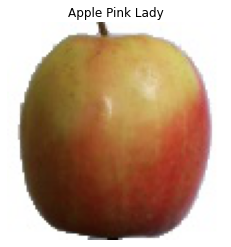

In [4]:
img = load_img(train_path + "Apple Pink Lady/0_100.jpg")
plt.imshow(img)
plt.title("Apple Pink Lady")
plt.axis("off")
plt.show()

In [5]:
shape_of_image = img_to_array(img)
print(shape_of_image.shape)



(100, 100, 3)


#Number of classes- Number of different types of fruits and vegetables

In [6]:
classes = glob(train_path + "/*")
number_of_class = len(classes)
print("Number of class : " , number_of_class)

Number of class :  131


#Changing shape of image arrays and zooming them 

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size = shape_of_image.shape[:2],
                                                   batch_size = 32,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


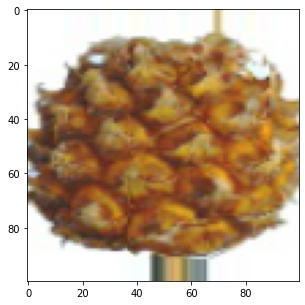

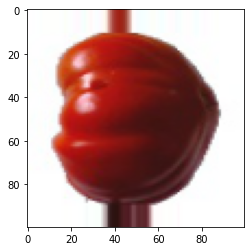

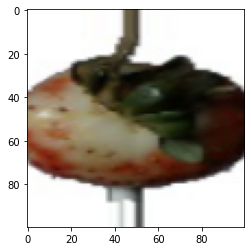

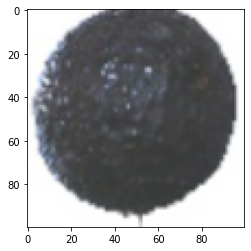

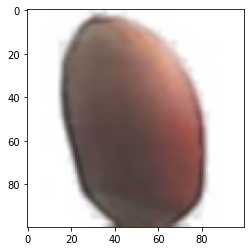

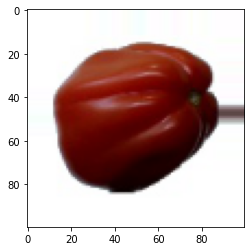

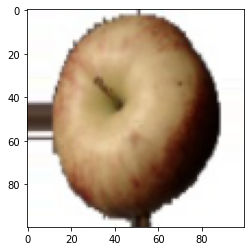

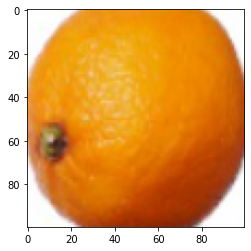

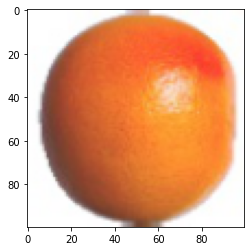

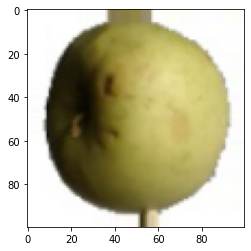

In [8]:
x,y = train_generator.next()
fig = plt.figure(figsize =(30,5))
for i in range(10):
 image = x[i]
 plt.imshow(image)
 plt.show()
    
   

#Custom CNN Architeture
no padding as edges have no information \
INPUT-CNN-MAXPOOL-CNN-MAXPOOL-CNN-MAXPOOL-FLATTEN-OUTPUT \



In [9]:
model = Sequential() 
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_class,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
batch_size = 32
number_of_batch = 1600 // batch_size
hist = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = number_of_batch,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 800 // batch_size
                   )
 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
50/50 [==============================] - 6s 119ms/step - loss: 4.7490 - accuracy: 0.0319 - val_loss: 4.2797 - val_accuracy: 0.0525
Epoch 2/100
50/50 [==============================] - 6s 116ms/step - loss: 3.8980 - accuracy: 0.0956 - val_loss: 3.1507 - val_accuracy: 0.2212
Epoch 3/100
50/50 [==============================] - 6s 117ms/step - loss: 3.1492 - accuracy: 0.2056 - val_loss: 2.4783 - val_accuracy: 0.3625
Epoch 4/100
50/50 [==============================] - 6s 117ms/step - loss: 2.5670 - accuracy: 0.2925 - val_loss: 1.9625 - val_accuracy: 0.4288
Epoch 5/100
50/50 [==============================] - 6s 117ms/step - loss: 2.1758 - accuracy: 0.3719 - val_loss: 1.4107 - val_accuracy: 0.6313
Epoch 6/100
50/50 [==============================] - 6s 119ms/step - loss: 1.8633 - accuracy: 0.4563 - val_loss: 1.7050 - val_accuracy: 0.5450
Epoch 7/100
50/50 [==============================] - 6s 119ms/step

#overfitting check

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


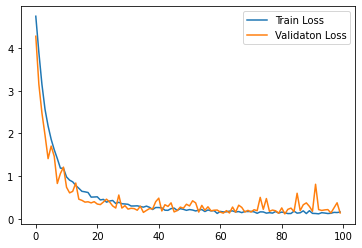

In [10]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()

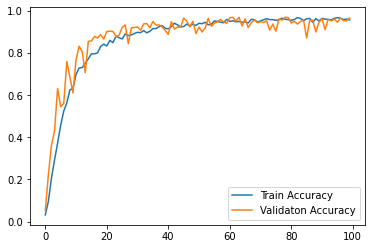

In [11]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()

#VGG 13
 RESEARCH PAPER -> https://arxiv.org/pdf/1409.1556.pdf /


In [19]:
vggmodel = Sequential() 
vggmodel.add(Conv2D(64,(3,3),activation = 'relu', input_shape = shape_of_image.shape))
vggmodel.add(Conv2D(64,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2, 2))

vggmodel.add(Conv2D(128,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(128,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))

vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(256,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))

vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(Conv2D(512,(3,3),activation = 'relu'))
vggmodel.add(MaxPooling2D(2,2))




vggmodel.add(Flatten())
vggmodel.add(Dense(1024,activation='relu'))
vggmodel.add(Dropout(0.5))
vggmodel.add(Dense(number_of_class,activation = 'softmax'))
vggmodel.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
batch_size = 32
number_of_batch = 1600 // batch_size
hist1 = vggmodel.fit_generator(
    generator = train_generator,
    steps_per_epoch = number_of_batch,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 800 // batch_size
                   )
 

Epoch 1/100
50/50 [==============================] - 10s 200ms/step - loss: 6.7410 - accuracy: 0.0088 - val_loss: 4.8723 - val_accuracy: 0.0088
Epoch 2/100
50/50 [==============================] - 10s 191ms/step - loss: 4.8755 - accuracy: 0.0113 - val_loss: 4.8460 - val_accuracy: 0.0100
Epoch 3/100
50/50 [==============================] - 9s 190ms/step - loss: 4.8892 - accuracy: 0.0150 - val_loss: 4.8597 - val_accuracy: 0.0088
Epoch 4/100
50/50 [==============================] - 10s 194ms/step - loss: 4.8416 - accuracy: 0.0156 - val_loss: 4.7040 - val_accuracy: 0.0162
Epoch 5/100
50/50 [==============================] - 9s 186ms/step - loss: 4.7584 - accuracy: 0.0150 - val_loss: 4.6554 - val_accuracy: 0.0137
Epoch 6/100
50/50 [==============================] - 9s 182ms/step - loss: 4.5245 - accuracy: 0.0206 - val_loss: 4.6420 - val_accuracy: 0.0137
Epoch 7/100
50/50 [==============================] - 9s 181ms/step - loss: 4.5182 - accuracy: 0.0213 - val_loss: 4.2083 - val_accuracy: 0.0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


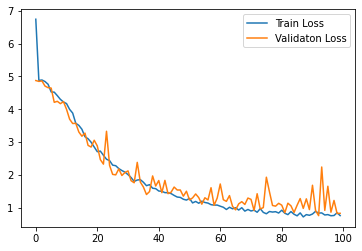

In [20]:
print(hist1.history.keys())
plt.plot(hist1.history["loss"],label = "Train Loss")
plt.plot(hist1.history["val_loss"],label = "Validaton Loss")
plt.legend()
plt.show()

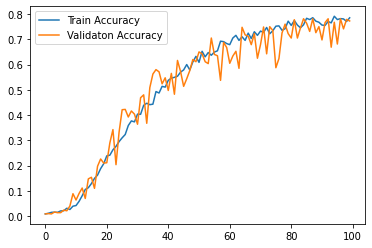

In [21]:
plt.figure()
plt.plot(hist1.history["accuracy"],label = "Train Accuracy")
plt.plot(hist1
         .history["val_accuracy"],label = "Validaton Accuracy")
plt.legend()
plt.show()

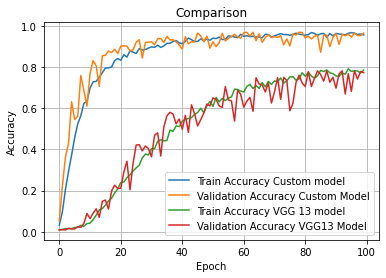

In [22]:
plt.grid()
plt.title("Comparison")
plt.plot(hist.history['accuracy'],
         label = 'Train Accuracy Custom model')
plt.plot(hist.history['val_accuracy'],  label = 'Validation Accuracy Custom Model')

plt.plot(hist1.history['accuracy'],
         label = 'Train Accuracy VGG 13 model')
plt.plot(hist1.history['val_accuracy'],  label = 'Validation Accuracy VGG13 Model')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.show()

In [70]:
customcnnpreds = model.predict_generator(test_generator)
vggpreds = vggmodel.predict_generator(test_generator)


#Custom CNN prediction results

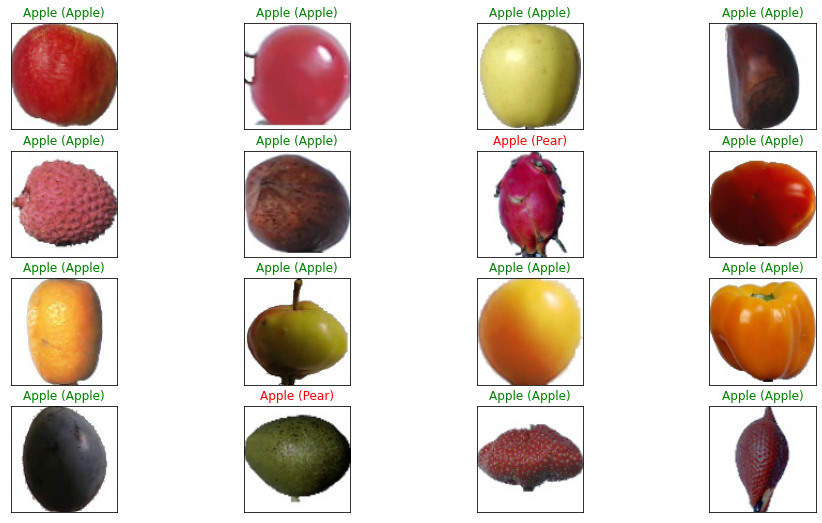

In [71]:
import numpy as np

# plot a random sample of test images, their predicted labels, and ground truth
class_names = ['Apple', 'Pear', 'Potato', 'Plum', 'Cherry',
               'Banana', 'Grape', 'Pepper', 'Tomato', 'Peach']
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_generator.next()[0][i]))
    pred_idx = np.argmax(customcnnpreds[0][i])
    true_idx = np.argmax(test_generator.next()[0][i])
    ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

#VGG 13  predictions results

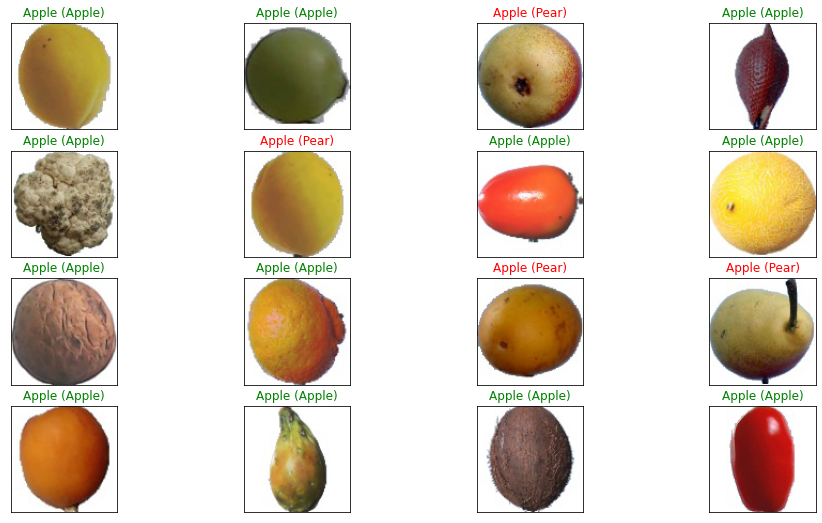

In [69]:
import numpy as np

# plot a random sample of test images, their predicted labels, and ground truth
class_names = ['Apple', 'Pear', 'Potato', 'Plum', 'Cherry',
               'Banana', 'Grape', 'Pepper', 'Tomato', 'Peach']
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(len(test_generator), size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_generator.next()[0][i]))
    pred_idx = np.argmax(vggpreds[0][i])
    true_idx = np.argmax(test_generator.next()[0][i])
    ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))